## Esercitazione 9   del   15  Aprile 2025


## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from SolveTriangular import *

## Esercizio 1
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcola
- d= np.diag(A) #Estrae la diagonale di A in un 1d numpy array
- D=np.diag(d) #Costruisce la matrice diagonale avente d come elementi della diagonale.
- E=np.tril(A,-1) #Costruisce la matrice E, formata dagli elementi della matrice A sotto la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- F=np.triu(A,1) #Costruisce la matrice F, formata dagli elementi della matrice A sopra la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- il raggio spettrale della matrice di iterazione $T=-D^{(-1)}(E+F)$ e la norma infinito della stessa matrice e li stampa

- Implementare in formato  matriciale, l'aggiornamento della soluzione ad ogni iterazione:

$$x^{(k)}=D^{(-1)}(b-(E+F)x^{(k-1)})$$

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [29]:
def jacobi(A, b, x0, toll, it_max):
    d=np.diag(A)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    invM=np.diag(1/d)
    T = np.dot(invM,N)
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale jacobi: ", raggiospettrale)
    
    it=0
    errore=1000
    err_vet=[]
    while it<it_max and errore >= toll:
        x = (b+N@x0)/d.reshape(n,1)
        errore= np.linalg.norm(x-x0)/np.linalg.norm(x)
        err_vet.append(errore)
        x0=x.copy()
        it+=1
    return x, it, err_vet
        

## Esercizio 2
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione l calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcola
- d= np.diag(A) #Estrae la diagonale di A in un 1d numpy array
- D=np.diag(d) #Costruisce la matrice diagonale avente d come elementi della diagonale.
- E=np.tril(A,-1) #Costruisce la matrice E, formata dagli elementi della matrice A sotto la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- F=np.triu(A,1) #Costruisce la matrice F, formata dagli elementi della matrice A sopra la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- il raggio spettrale della matrice di iterazione $T=-(D+E)^{-1}F$ e la sua norma infinito e li stampa.

- Implementare in formato  matriciale, l'aggiornamento della soluzione ad ogni iterazione come soluzione del sistema triangolare inferiore (usa Lsolve per risolverlo) con matrice dei coefficienti (D+E) e termine noto $b-Fx^{(k-1)}$ (vedi Teoria)

$$(D+E) x^{(k)}= b-Fx^{(k-1)}$$

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [30]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1)
    F=np.triu(A,1)
    M=E+D
    N=-F 
    invM=np.linalg.inv(M)
    T= invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll: 
        temp =b-F@x0
        x,flag=Lsolve(M, temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 3
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[8,1,3],[3,5,1],[1,1,17]],dtype=float) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]],dtype=float)
- A=np.array([[1,3,2],[7,8,3],[14,3,10]],dtype=float)
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]],dtype=float)
- A=np.array([[9,1,16],[1,11,1],[16,1,29]],dtype=float)
ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=1000 e x0=np.zeros(A.shape[0]

[[ 8  1  3]
 [ 3  5  1]
 [ 1  1 17]]
raggio spettrale jacobi:  0.38361276817058704
JACOBI
sol:  [[1.]
 [1.]
 [1.]] it:  21
raggio spettrale Gauss-Seidel  0.07631935991363357
GAUSS
sol:  [[1.]
 [1.]
 [1.]] it:  9


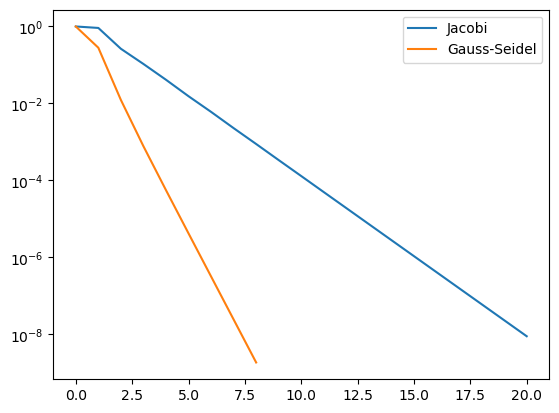

In [31]:
A=np.array([[8,1,3],[3,5,1],[1,1,17]])
print(A)
toll=1e-8
it_max=100
n=A.shape[0]
x0=np.zeros(A.shape[0]).reshape(n,1)
b=np.sum(A,axis=1).reshape(n,1)
sol1, it1, er_vet1= jacobi(A, b, x0,toll, it_max)
plt.semilogy(np.arange(it1), er_vet1)
print("JACOBI\nsol: ", sol1, "it: ", it1)

sol2, it2, er_vet2= gauss_seidel(A, b, x0,toll, it_max)
print("GAUSS\nsol: ", sol2, "it: ", it2)
plt.semilogy(np.arange(it2),er_vet2)
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

## Esercizio 4
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcola
- d= np.diag(A) #Estrae la diagonale di A in un 1d numpy array
- D=np.diag(d) #Costruisce la matrice diagonale avente d come elementi della diagonale.
- E=np.tril(A,-1) #Costruisce la matrice E, formata dagli elementi della matrice A sotto la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- F=np.triu(A,1) #Costruisce la matrice F, formata dagli elementi della matrice A sopra la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- il raggio spettrale della matrice di iterazione $T(\omega)$$ (vedi dispense per la formula della matrice di iterazione T nel caso di Gauss_Seidel SOR) e la sua norma infinito e li stampa.

- Implementare in formato  matriciale, l'aggiornamento della soluzione ad ogni iterazione con i seguenti passi:

  -  calcolare 
  $$\tilde{x}^{(k)}$$
  come soluzione del sistema triangolare inferiore (usa Lsolve per risolverlo) con matrice dei coefficienti (D+E) e termine noto $b-Fx^{(k-1)}$ (vedi Teoria)
  $$(D+E) \tilde{x}^{(k)}= b-Fx^{(k-1)}$$

  - la soluzione al passo k di Gauss Seidel SOR sarà quindi calcolata come 
  $$x^{(k)}= (1-\omega)x^{(k-1)}+\omega \tilde{x}^{(k)}$$

Indicato con $x^{(0)}$ un vettore casuale di n componenti (n è l'ordine della matrice), il procedimento iterativo per il calcolo della soluzione del sistema lineare consiste nell'iterare il segeunte schema fino a quando non venga soddisfatto il criterio di arresto:

$$(D+E) \tilde{x}^{(k)}= b-Fx^{(k-1)}$$
$$x^{(k)}= (1-\omega)x^{(k-1)}+\omega  \tilde{x}^{(k)}$$

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [32]:
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    Dinv= np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(np.linalg.inv(Momega), Nomega)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-np.dot(F, xold)
        xtilde,flag=Lsolve(M, temp)
        xnew=(1-omega)*xold +omega*xtilde
        errore= np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet


## Esercizio 5
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [33]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A
    

raggio spettrale jacobi:  0.8451732757464319
raggio spettrale Gauss-Seidel  0.7185579379397851
raggio spettrale Gauss-Seidel SOR  0.5103393892922701


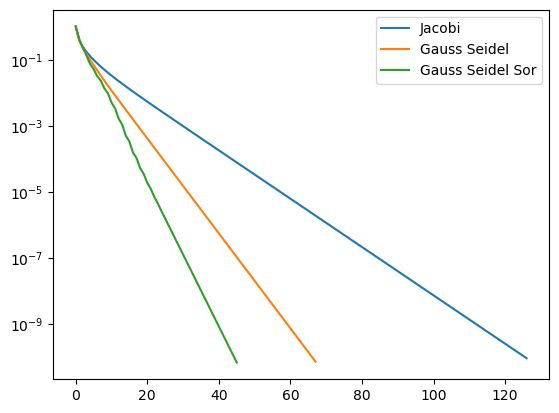

In [34]:
A=creaPoisson(10)
b=np.sum(A,axis=1)
toll=1e-10
it_max=1000
n=A.shape[0]
x0=np.zeros(A.shape[0]).reshape(n,1)
b=np.sum(A,axis=1).reshape(n,1)
sol_jac,it_jac,err_vet_jac=jacobi(A,b,x0,toll,it_max)
plt.semilogy(np.arange(it_jac),err_vet_jac)
#print("sol=",sol_jac,"it ",it_jac)
solgs,itgs,err_vet_gs=gauss_seidel(A,b,x0,toll,it_max)
#print("solgs=",solgs,"it ",itgs)
plt.semilogy(np.arange(itgs),err_vet_gs)
 
omega=1.4
solgs_sor,itgs_sor,err_vet_gs_sor=gauss_seidel_sor(A,b,x0,toll,it_max,omega)
#print("solgs_sor=",solgs_sor,"it ",itgs_sor)
plt.semilogy(np.arange(itgs_sor),err_vet_gs_sor)
plt.legend(['Jacobi','Gauss Seidel','Gauss Seidel Sor'])
plt.show()

#Si nota come a raggio spettrale più piccolo, corrisponde una maggiore velocità (minor numero di iterazioni)